In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train_dataset_with_label_fill_user_mean.csv')
df = pd.DataFrame(df)

In [2]:
cols_group1 = list(range(1, 27)) + [-1]
df_activity = df.iloc[:, cols_group1]

# 1, 2번째 열과 26번째부터 마지막 열을 포함한 그룹 묶기
cols_group2 = [1, 2] + list(range(26, df.shape[1]))
df_sleep = df.iloc[:, cols_group2]

df_sleep.to_csv('sleep.csv', index=False)
df_activity.to_csv('activity.csv', index = False)

In [3]:
sleep = pd.DataFrame(df_sleep)
activity = pd.DataFrame(df_activity)

In [12]:
sleep

,date,activity_average_met,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,DIAG_NM
0,2020/10/19,1.281250,6570.0,18.000,7440.0,28680.0,77.0,52.82,49.0,1.0,...,98.0,77.0,65.0,97.0,43.0,65.0,0.34,0.34,22110.0,MCI
1,2020/10/20,1.250000,10530.0,18.000,4620.0,32040.0,67.0,52.01,47.0,1.0,...,94.0,60.0,41.0,75.0,68.0,62.0,-0.07,-0.07,21510.0,MCI
2,2020/10/21,1.218750,4080.0,17.500,7440.0,25440.0,84.0,51.07,46.0,1.0,...,98.0,80.0,81.0,83.0,73.0,62.0,-0.14,-0.14,21360.0,MCI
3,2020/10/22,1.281250,7170.0,17.875,4320.0,20700.0,65.0,50.80,47.0,1.0,...,88.0,72.0,39.0,78.0,25.0,29.0,-0.50,-0.50,13530.0,MCI
4,2020/10/23,1.468750,2850.0,19.000,7290.0,27180.0,90.0,59.68,52.0,1.0,...,98.0,75.0,95.0,70.0,71.0,74.0,-0.14,-0.14,24330.0,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,2020/10/18,1.613839,2370.0,15.375,690.0,32220.0,93.0,62.92,58.0,1.0,...,14.0,58.0,98.0,89.0,96.0,96.0,-0.13,-0.13,29850.0,CN
11332,2020/11/27,1.613839,3990.0,15.875,1470.0,27960.0,86.0,62.03,58.0,1.0,...,29.0,67.0,86.0,67.0,97.0,72.0,-0.18,-0.18,23970.0,CN
11333,2020/12/03,1.613839,3690.0,16.125,750.0,27360.0,87.0,63.46,56.0,1.0,...,15.0,46.0,88.0,83.0,72.0,71.0,-0.17,-0.17,23670.0,CN
11334,2020/12/23,1.613839,6000.0,15.875,1710.0,33360.0,82.0,63.75,57.0,1.0,...,34.0,57.0,76.0,81.0,95.0,86.0,-0.09,-0.09,27360.0,CN


In [13]:
df_sleep_CN = sleep.loc[sleep['DIAG_NM'] == 'CN']
# DEM에 해당하는 데이터 추출
df_sleep_DEM = sleep.loc[sleep['DIAG_NM'] == 'Dem']
# MCI에 해당하는 데이터 추출
df_sleep_MCI = sleep.loc[sleep['DIAG_NM'] == 'MCI']

In [5]:
df_sleep_CN.shape

(6770, 30)

In [6]:
df_sleep_DEM.shape

(0, 30)

In [7]:
df_sleep_MCI

,date,activity_average_met,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,DIAG_NM
0,2020/10/19,1.281250,6570.000000,18.000000,7440.000000,28680.000000,77.000000,52.820000,49.000000,1.0,...,98.000000,77.000000,65.000000,97.000000,43.00000,65.000000,0.340000,0.340000,22110.000000,MCI
1,2020/10/20,1.250000,10530.000000,18.000000,4620.000000,32040.000000,67.000000,52.010000,47.000000,1.0,...,94.000000,60.000000,41.000000,75.000000,68.00000,62.000000,-0.070000,-0.070000,21510.000000,MCI
2,2020/10/21,1.218750,4080.000000,17.500000,7440.000000,25440.000000,84.000000,51.070000,46.000000,1.0,...,98.000000,80.000000,81.000000,83.000000,73.00000,62.000000,-0.140000,-0.140000,21360.000000,MCI
3,2020/10/22,1.281250,7170.000000,17.875000,4320.000000,20700.000000,65.000000,50.800000,47.000000,1.0,...,88.000000,72.000000,39.000000,78.000000,25.00000,29.000000,-0.500000,-0.500000,13530.000000,MCI
4,2020/10/23,1.468750,2850.000000,19.000000,7290.000000,27180.000000,90.000000,59.680000,52.000000,1.0,...,98.000000,75.000000,95.000000,70.000000,71.00000,74.000000,-0.140000,-0.140000,24330.000000,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10977,2021/01/09,1.343750,7050.000000,16.500000,10950.000000,34560.000000,80.000000,61.770000,53.000000,1.0,...,100.000000,73.000000,72.000000,67.000000,22.00000,87.000000,-0.040000,-0.040000,27510.000000,MCI
10978,2021/01/10,1.281250,7620.000000,16.500000,10770.000000,33420.000000,77.000000,58.660000,51.000000,1.0,...,100.000000,72.000000,65.000000,83.000000,34.00000,80.000000,0.110000,0.110000,25800.000000,MCI
10979,2021/01/11,1.875000,7464.146341,16.292683,9676.829268,30509.268293,76.195122,59.360244,51.121951,1.0,...,99.634146,71.121951,63.146341,85.317073,28.95122,68.634146,-0.037317,-0.037317,23045.121951,MCI
10980,2020/11/30,1.595274,4710.000000,16.125000,10290.000000,23100.000000,80.000000,59.290000,52.000000,1.0,...,100.000000,70.000000,72.000000,75.000000,6.00000,49.000000,-0.190000,-0.190000,18390.000000,MCI


In [8]:
x = sleep[['sleep_breath_average','sleep_hr_average', 'sleep_rem', 'sleep_hr_average','sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']]
y_CN = df_sleep_CN.loc[df_sleep_CN['DIAG_NM'] == 'CN'].iloc[:, -1]
y_DEM = df_sleep_DEM.loc[df_sleep_DEM['DIAG_NM'] == 'DEM'].iloc[:, -1]
y_MCI = df_sleep_MCI.loc[df_sleep_MCI['DIAG_NM'] == 'MCI'].iloc[:, -1]

In [9]:
y_CN

67       CN
68       CN
69       CN
70       CN
71       CN
         ..
11331    CN
11332    CN
11333    CN
11334    CN
11335    CN
Name: DIAG_NM, Length: 6770, dtype: object

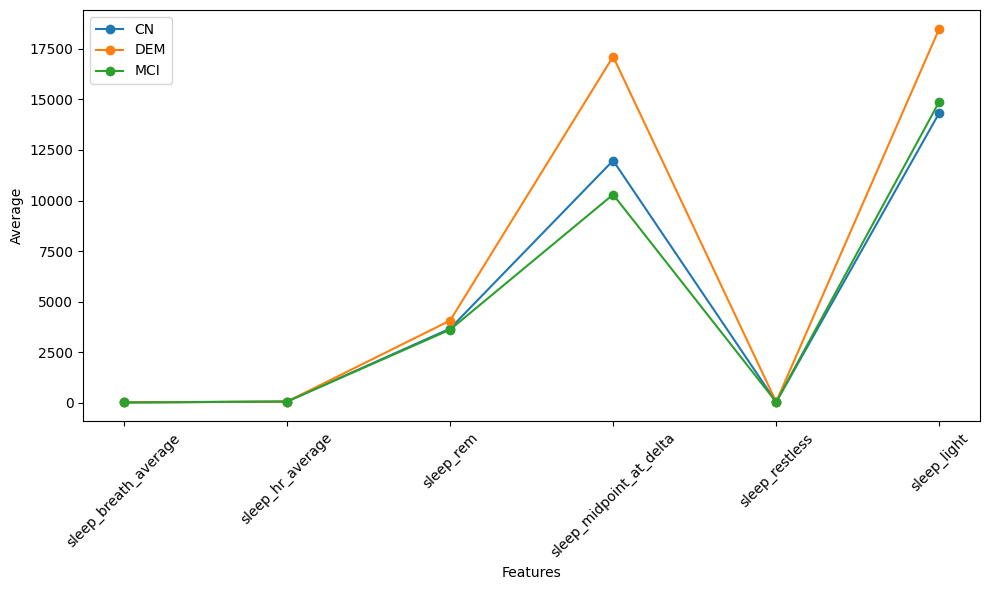

In [18]:
import numpy as np
import matplotlib.pyplot as plt

features = ['sleep_breath_average', 'sleep_hr_average', 'sleep_rem', 'sleep_midpoint_at_delta', 'sleep_restless', 'sleep_light']

# 각 그룹에 대한 데이터 개수
n_CN = len(df_sleep_CN)
n_DEM = len(df_sleep_DEM)
n_MCI = len(df_sleep_MCI)

# 데이터 개수를 동일하게 맞춤
min_data_count = min(n_CN, n_DEM, n_MCI)
df_sleep_CN = df_sleep_CN.sample(min_data_count)
df_sleep_DEM = df_sleep_DEM.sample(min_data_count)
df_sleep_MCI = df_sleep_MCI.sample(min_data_count)

# 각 그룹에 대한 feature 평균 계산
means_CN = df_sleep_CN[features].mean()
means_DEM = df_sleep_DEM[features].mean()
means_MCI = df_sleep_MCI[features].mean()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 그룹별 평균 값을 선 그래프로 그리기
ax.plot(features, means_CN, label='CN', marker='o')
ax.plot(features, means_DEM, label='DEM', marker='o')
ax.plot(features, means_MCI, label='MCI', marker='o')

# x축 설정
ax.set_xlabel('Features')

# y축 설정
ax.set_ylabel('Average')

# 범례 설정
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
df_activity_CN = activity.loc[activity['DIAG_NM'] == 'CN']
# DEM에 해당하는 데이터 추출
df_activity_DEM = activity.loc[activity['DIAG_NM'] == 'Dem']
# MCI에 해당하는 데이터 추출
df_activity_MCI = activity.loc[activity['DIAG_NM'] == 'MCI']

In [ ]:
x = sleep[['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']]
z_CN = df_activity_CN.loc[df_activity_CN['DIAG_NM'] == 'CN'].iloc[:, -1]
z_DEM = df_activity_DEM.loc[df_activity_DEM['DIAG_NM'] == 'Dem'].iloc[:, -1]
z_MCI = df_activity_MCI.loc[df_activity_MCI['DIAG_NM'] == 'MCI'].iloc[:, -1]

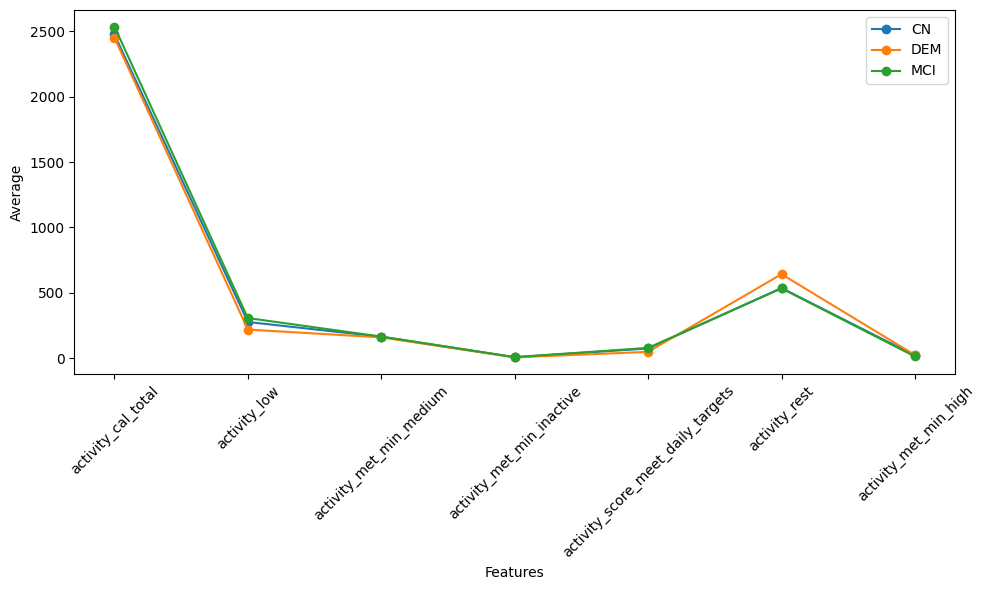

In [20]:
import numpy as np
import matplotlib.pyplot as plt

features = ['activity_cal_total', 'activity_low', 'activity_met_min_medium', 'activity_met_min_inactive', 'activity_score_meet_daily_targets', 'activity_rest', 'activity_met_min_high']

# 각 그룹에 대한 데이터 개수
n_CN = len(df_activity_CN)
n_DEM = len(df_activity_DEM)
n_MCI = len(df_activity_MCI)

# 데이터 개수를 동일하게 맞춤
min_data_count = min(n_CN, n_DEM, n_MCI)
df_activity_CN = df_activity_CN.sample(min_data_count)
df_activity_DEM = df_activity_DEM.sample(min_data_count)
df_activity_MCI = df_activity_MCI.sample(min_data_count)

# 각 그룹에 대한 feature 평균 계산
means_CN = df_activity_CN[features].mean()
means_DEM = df_activity_DEM[features].mean()
means_MCI = df_activity_MCI[features].mean()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 그룹별 평균 값을 선 그래프로 그리기
ax.plot(features, means_CN, label='CN', marker='o')
ax.plot(features, means_DEM, label='DEM', marker='o')
ax.plot(features, means_MCI, label='MCI', marker='o')

# x축 설정
ax.set_xlabel('Features')

# y축 설정
ax.set_ylabel('Average')

# 범례 설정
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
